In [1]:
import os
import pandas as pd
from pycytominer import aggregate
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set data input folder
data_input_folder = "inputs_data"

# Set image input folder
image_input_folder = "inputs_images"

# Set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Load barcodes used in experiment
guide_df = pd.read_csv('../common_files/Barcodes.csv')
guide_list = guide_df['gene_symbol'].to_list()

In [4]:
# Load hit lists from experiments
HeLa_DMEM_comp_spec_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').set_index('Gene')
HeLa_DMEM_whole_cell_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').set_index('Gene')
HeLa_DMEM_hit_list = list(HeLa_DMEM_comp_spec_hits.index) + list(HeLa_DMEM_whole_cell_hits.index)

HeLa_HPLM_comp_spec_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_HPLM_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').set_index('Gene')
HeLa_HPLM_whole_cell_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_HPLM_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').set_index('Gene')
HeLa_HPLM_hit_list = list(HeLa_HPLM_comp_spec_hits.index) + list(HeLa_HPLM_whole_cell_hits.index)

A549_comp_spec_hits = pd.read_csv('../2_A549_WGS_Summary/outputs/A549_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').set_index('Gene')
A549_whole_cell_hits = pd.read_csv('../2_A549_WGS_Summary/outputs/A549_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').set_index('Gene')
A549_hit_list = list(A549_comp_spec_hits.index) + list(A549_whole_cell_hits.index)

In [5]:
# Define features lists
ConA_Granularity_cols = ['Cells_Granularity_1_ConA','Cells_Granularity_2_ConA',
                'Cells_Granularity_3_ConA','Cells_Granularity_4_ConA',
                'Cells_Granularity_5_ConA','Cells_Granularity_7_ConA',
                'Cells_Granularity_6_ConA', 'Cells_Granularity_8_ConA']
WGA_Granularity_cols = ['Cells_Granularity_1_WGA','Cells_Granularity_2_WGA',
                'Cells_Granularity_3_WGA','Cells_Granularity_4_WGA',
                'Cells_Granularity_5_WGA','Cells_Granularity_6_WGA',
                'Cells_Granularity_7_WGA', 'Cells_Granularity_8_WGA']

# Create aggregated databases

Aggregation may be too computationally intensive for a standard personal computer.  
Skip aggregation by downloading aggregated files following instructions in README.md

## HeLa

In [ ]:
# Load normalized plate_level profiles, remove ghost guides, and merge 
DMEM_plates = ['CP257A','CP257B','CP257D','CP257F','CP257H']
HPLM_plates = ['CP257J','CP257K','CP257L','CP257N']

DMEM_list = []
for plate in DMEM_plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_DMEM_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_DMEM_df = pre_DMEM_df[pre_DMEM_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    DMEM_list.append(pre_DMEM_df)

HeLa_DMEM_df = pd.concat(DMEM_list)

HPLM_list = []
for plate in HPLM_plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_HPLM_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_HPLM_df = pre_HPLM_df[pre_HPLM_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    HPLM_list.append(pre_HPLM_df)

HeLa_HPLM_df = pd.concat(HPLM_list)

HeLa_DMEM_df.head()

In [ ]:
# Perform median aggregation on profiles
HeLa_DMEM_df = aggregate(
            population_df=HeLa_DMEM_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )

HeLa_HPLM_df = aggregate(
            population_df=HeLa_HPLM_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )
            
HeLa_DMEM_df.to_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv', index=False))
HeLa_HPLM_df.to_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___HPLM___ALLWELLS.csv', index=False))
HeLa_DMEM_df.head()

In [ ]:
# Create and save Granularity subsetted versions to simplify data handling
HeLa_DMEM_ConA_Granularity_df = HeLa_DMEM_df[ConA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]
HeLa_HPLM_ConA_Granularity_df = HeLa_HPLM_df[ConA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]

HeLa_DMEM_ConA_Granularity_df.to_csv(os.path.join(output_folder,'HeLa_DMEM_ConA_Granularity.csv'), index=False)
HeLa_HPLM_ConA_Granularity_df.to_csv(os.path.join(output_folder,'HeLa_HPLM_ConA_Granularity.csv'), index=False)

HeLa_DMEM_WGA_Granularity_df = HeLa_DMEM_df[WGA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]
HeLa_HPLM_WGA_Granularity_df = HeLa_HPLM_df[WGA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]

HeLa_DMEM_WGA_Granularity_df.to_csv(os.path.join(output_folder,'HeLa_DMEM_WGA_Granularity.csv'), index=False)
HeLa_HPLM_WGA_Granularity_df.to_csv(os.path.join(output_folder,'HeLa_HPLM_WGA_Granularity.csv'), index=False)


## A549

In [ ]:
# Load normalized plate_level profiles, remove ghost guides, and merge 
plates = ['CP186','CP186B','CP186C','CP186D','CP186E','CP186F','CP186G','CP186H','CP186N']

A549_list = []
for plate in plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_df = pre_df[pre_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    A549_list.append(pre_df)

A549_df = pd.concat(A549_list)
A549_df.head()

In [ ]:
# Perform median aggregation on profiles
A549_df= aggregate(
            population_df=A549_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )

A549_df.to_csv(os.path.join(data_input_folder,'20200805_A549_WG_Screen_guide_normalized_median_merged_ALLBATCHES_ALLWELLS', index=False))
A549_df.head()

In [ ]:
# Create and save Granularity subsetted versions to simplify data handling
A549_ConA_Granularity_df = A549_df[ConA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]
A549_WGA_Granularity_df = A549_df[WGA_Granularity_cols+['Metadata_Foci_Barcode_MatchedTo_GeneCode']]

A549_ConA_Granularity_df.to_csv(os.path.join(output_folder,'A549_ConA_Granularity_features_only.csv'), index=False)
A549_WGA_Granularity_df.to_csv(os.path.join(output_folder,'A549_WGA_Granularity_features_only.csv'), index=False)

# ConA Granularity

In [6]:
# Load aggregated and ConA Granularity subsetted files if not running notebook straight through
# You can skip this loading if you have just created the aggregated database in previous cells

HeLa_HPLM_ConA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'HeLa_HPLM_ConA_Granularity_features_only.csv'))
HeLa_DMEM_ConA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'HeLa_DMEM_ConA_Granularity_features_only.csv'))
A549_ConA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'A549_ConA_Granularity_features_only.csv'))


In [7]:
GPI = ['PIGA', 'PIGC', 'PIGH', 'PIGP', 'PIGQ', 'PIGY', 'DPM2', 'PIGL', 'PIGM', 'PIGN', 'PIGB', 'PIGF', 'PIGO', 'PIGV', 'PIGW', 'PIGX', 'DPM1', 'DPM3', 'MPDU1','PIGK', 'PIGS', 'PIGT', 'PIGU', 'GPAA1']
Nglycan_ER = ['ALG10','DPM1','DPM2','DPM3','ALG3','ALG9','ALG12','ALG6','ALG8','ALG10B','DDOST','RPN1','RPN2','STT3A',
              'DAD1','TUSC3', 'MOGS','GANAB','MAN1A1','MAN1A2','MAN1B1','MAN1C1','STT3B',]
Nglycan_Golgi = ['MAN2A1','MAN2A2','MGAT1','MGAT2','MGAT3','MGAT4A','MGAT4B','MGAT4C','MGAT5','B4GALT1','B4GALT2',
                 'B4GALT3','B4GALT5','FUT8','ST6GAL1','ST6GAL2',]
Nglycan_Cyto = ['MAN2C1','ENGASE','FDPS','GGPS1','NEU2','NEU4','ALG5','DHDDS','DOLPP1','DOLK',
            'DPAGT1','ALG1','ALG2','ALG11','ALG13','ALG14',]
Nglycan_Lyso = ['AGA','FUCA1','FUCA2','HEXA','HEXB','HEXDC','CTSA','GALNS','GLB1','MAN2B1','MAN2B2','MANBA','NEU1','NEU3',]

genelist = GPI + Nglycan_Cyto + Nglycan_ER + Nglycan_Golgi + Nglycan_Lyso + ['nontargeting']

HeLa_HPLM_ConA_Granularity_df = HeLa_HPLM_ConA_Granularity_df[HeLa_HPLM_ConA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_HPLM_ConA_Granularity_meandf = HeLa_HPLM_ConA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

HeLa_DMEM_ConA_Granularity_df = HeLa_DMEM_ConA_Granularity_df[HeLa_DMEM_ConA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_DMEM_ConA_Granularity_meandf = HeLa_DMEM_ConA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

A549_ConA_Granularity_df = A549_ConA_Granularity_df[A549_ConA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
A549_ConA_Granularity_meandf = A549_ConA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

for meandf,screen in [(HeLa_HPLM_ConA_Granularity_meandf,'HeLa_HPLM'), (HeLa_DMEM_ConA_Granularity_meandf,'HeLa_DMEM'), (A549_ConA_Granularity_meandf,'A549')]:
    for row in meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
        if row in GPI:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'GPI'
        elif row in Nglycan_ER:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_ER'
        elif row in Nglycan_Golgi:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Golgi'
        elif row in Nglycan_Cyto:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Cyto'
        elif row in Nglycan_Lyso:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Lyso'
    meandf = meandf.astype({'Path': 'category','Metadata_Foci_Barcode_MatchedTo_GeneCode': 'category'})
    meandf.to_csv(os.path.join(output_folder,f'{screen}_ConA_Granularity_annotated.csv'), index=False)

HeLa_DMEM_ConA_Granularity_meandf.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Cells_Granularity_1_ConA,Cells_Granularity_2_ConA,Cells_Granularity_3_ConA,Cells_Granularity_4_ConA,Cells_Granularity_5_ConA,Cells_Granularity_7_ConA,Cells_Granularity_6_ConA,Cells_Granularity_8_ConA,Path
0,AGA,-0.177880,0.192649,0.102555,0.118127,0.020682,-0.644047,-0.468880,-0.500135,Nglycan_Lyso
1,ALG1,0.908293,-1.705200,-0.782395,-0.947021,-0.908688,-0.399456,-0.627460,-0.447031,Nglycan_Cyto
2,ALG10,-0.127121,-0.014908,-0.051447,0.149752,-0.182835,0.211677,0.163242,-0.517323,Nglycan_ER
3,ALG10B,0.476532,-0.329120,0.117172,-0.294506,-0.526058,-0.484761,-0.403465,-0.478492,Nglycan_ER
4,ALG11,0.088880,-0.992913,-0.393255,-0.564643,-0.805150,-0.012812,-0.312825,0.175980,Nglycan_Cyto


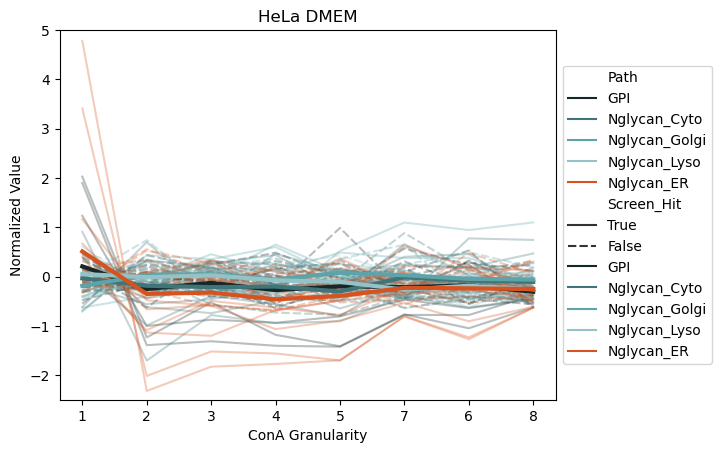

In [8]:
ecdfdf = HeLa_DMEM_ConA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in HeLa_DMEM_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa DMEM')
plt.savefig(os.path.join(output_folder,'figure_panels','HeLa_DMEM_ConA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

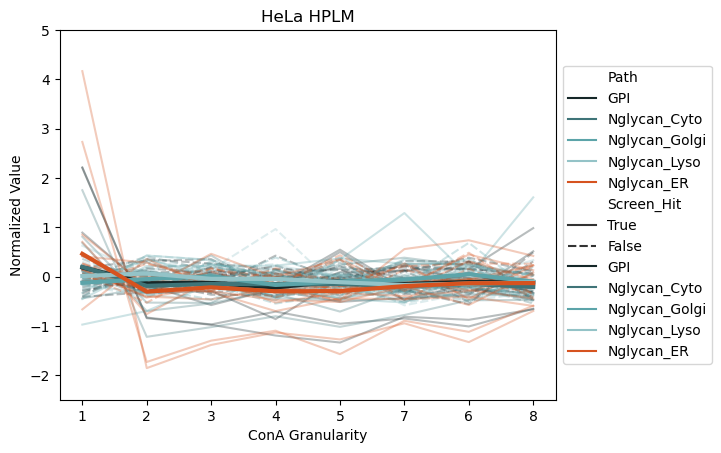

In [9]:
ecdfdf = HeLa_HPLM_ConA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in HeLa_HPLM_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa HPLM')
plt.savefig(os.path.join(output_folder,'figure_panels','HeLa_HPLM_ConA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

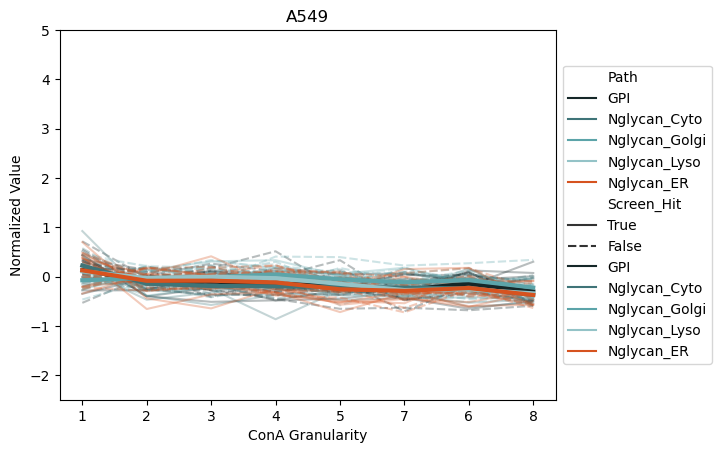

In [10]:
ecdfdf = A549_ConA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in A549_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('A549')
plt.savefig(os.path.join(output_folder,'figure_panels','A549_ConA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

# WGA Granularity

In [11]:
# Load aggregated files if not running notebook straight through
# You can skip this loading if you have just created the aggregated database in previous cells

HeLa_HPLM_WGA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'HeLa_HPLM_WGA_Granularity_features_only.csv'))
HeLa_DMEM_WGA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'HeLa_DMEM_WGA_Granularity_features_only.csv'))
A549_WGA_Granularity_df = pd.read_csv(os.path.join(output_folder, 'A549_WGA_Granularity_features_only.csv'))


In [22]:
V1 = ['ATP6V1A', 'ATP6V1B1', 'ATP6V1B2', 'ATP6V1C1', 'ATP6V1C2', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1E2', 
        'ATP6V1G1', 'ATP6V1G2', 'ATP6V1G3', 'ATP6V1F', 'ATP6V1H']
V0 = ['ATP6V0A1', 'ATP6V0A2', 'ATP6V0A4', 'ATP6V0B', 'ATP6V0C', 'ATP6V0D1', 'ATP6V0D2', 
      'ATP6V0E1', 'ATP6V0E2', 'ATP6AP1', 'ATP6AP2', 'RNASEK', 'ATP6V0A3','TCIRG1']
Assembly = ['ALDOB', 'CCDC115', 'VMA21', 'TMEM199', 'TM9SF4']

genelist = V1 + V0 + Assembly + ['nontargeting']

HeLa_HPLM_WGA_Granularity_df = HeLa_HPLM_WGA_Granularity_df[HeLa_HPLM_WGA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_HPLM_WGA_Granularity_meandf = HeLa_HPLM_WGA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

HeLa_DMEM_WGA_Granularity_df = HeLa_DMEM_WGA_Granularity_df[HeLa_DMEM_WGA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_DMEM_WGA_Granularity_meandf = HeLa_DMEM_WGA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

A549_WGA_Granularity_df = A549_WGA_Granularity_df[A549_WGA_Granularity_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
A549_WGA_Granularity_meandf = A549_WGA_Granularity_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

for meandf,screen in [(HeLa_HPLM_WGA_Granularity_meandf,'HeLa_HPLM'), (HeLa_DMEM_WGA_Granularity_meandf,'HeLa_DMEM'), (A549_WGA_Granularity_meandf,'A549')]:
    for row in meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
        if row in V0:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'V0'
        if row in V1:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'V1'
        if row in Assembly:
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'Assembly'
        if row == 'nontargeting':
            meandf.loc[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'control'
    meandf = meandf.astype({'Subunit': 'category','Metadata_Foci_Barcode_MatchedTo_GeneCode': 'category'})
    meandf.to_csv(os.path.join(output_folder,f'{screen}_WGA_Granularity_annotated.csv'), index=False)

HeLa_HPLM_WGA_Granularity_meandf.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Cells_Granularity_1_WGA,Cells_Granularity_2_WGA,Cells_Granularity_3_WGA,Cells_Granularity_4_WGA,Cells_Granularity_5_WGA,Cells_Granularity_6_WGA,Cells_Granularity_7_WGA,Cells_Granularity_8_WGA,Subunit
0,ALDOB,-0.447338,0.357686,-0.020960,-0.292061,-0.419399,0.213564,0.163909,0.235526,Assembly
1,ATP6AP1,-0.151619,0.450786,0.222052,-0.098751,0.274049,0.294694,0.247055,-0.055196,V0
2,ATP6AP2,0.007554,-0.030180,0.075321,-0.019468,-0.068548,-0.251546,-0.310216,-0.507260,V0
3,ATP6V0A1,-0.231419,-0.234220,0.098330,-0.254492,0.056772,0.079203,-0.026426,0.375781,V0
4,ATP6V0A2,0.058131,-0.064871,0.065942,-0.175694,0.025813,-0.171291,-0.453497,-0.273113,V0


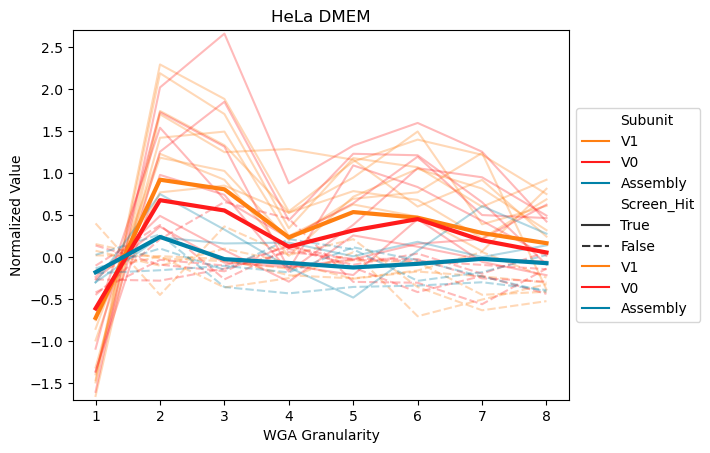

In [13]:
ecdfdf = HeLa_DMEM_WGA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in HeLa_DMEM_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value",
                 hue="Subunit", hue_order=['V1','V0','Assembly'], 
                 palette=["#ff7f11","#ff1b1c","#0081a7"], alpha=.3,
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None, 
                 data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)
g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa DMEM')
plt.savefig(os.path.join(output_folder,'figure_panels','HeLa_DMEM_WGA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

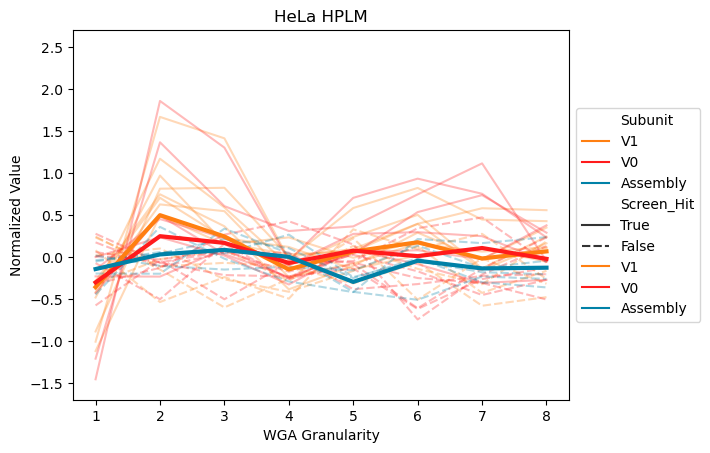

In [14]:
ecdfdf = HeLa_HPLM_WGA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in HeLa_HPLM_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Subunit", hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 style='Screen_Hit', style_order=['True', 'False'],units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)

g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa HPLM')
plt.savefig(os.path.join(output_folder,'figure_panels','HeLa_HPLM_WGA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

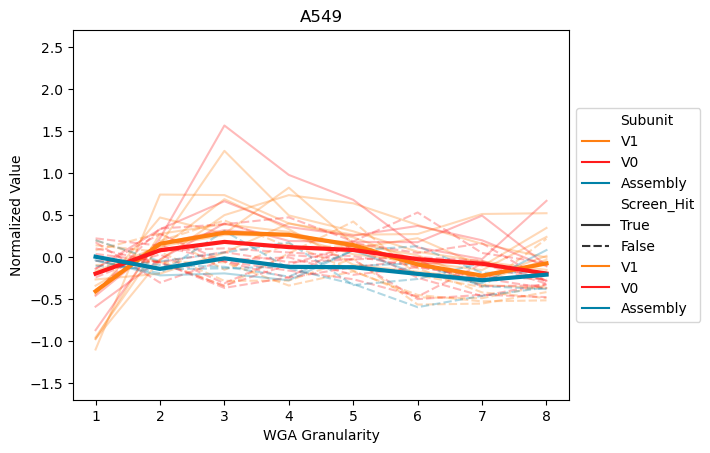

In [15]:
ecdfdf = A549_WGA_Granularity_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
for row in ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
    if row in A549_hit_list:
        ecdfdf.loc[ecdfdf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Screen_Hit'] = 'True'
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Subunit", hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 style='Screen_Hit', style_order=['True', 'False'], units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)

g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('A549')
plt.savefig(os.path.join(output_folder,'figure_panels','A549_WGA_ecdf_plot.png'), dpi=1200,bbox_inches='tight')
plt.show()

# Visualize Granularity

In [16]:
%matplotlib inline
import numpy
import skimage
import skimage.morphology 
import scipy
import matplotlib.pyplot as plt
from imageio import imread
import os

In [17]:
# subfactor = "Subsampling factor for granularity measurements"
# samp_size = "Subsampling factor for background reduction"
# radius = "Radius of structuring element"
# eros = "Range of the granular spectrum"

def show_granularity_result(figname, pixels,subfactor,samp_size,radius,eros, viewscale=1, outputseparate=False):
    # Rescale image 
    orig = pixels.copy()
    
    new_shape = numpy.array(pixels.shape)
    new_shape = new_shape * subfactor
    i, j = (
        numpy.mgrid[0 : new_shape[0], 0 : new_shape[1]].astype(float)
        / subfactor
    )
    pixels = scipy.ndimage.map_coordinates(pixels, (i, j), order=1)

    mask = numpy.ones_like(pixels)
    prepixels = pixels.copy()
    
    # Do initial processing based on radius
    back_shape = new_shape * samp_size
    i, j = (
        numpy.mgrid[0 : back_shape[0], 0 : back_shape[1]].astype(float)
        / samp_size
    )
    back_pixels = scipy.ndimage.map_coordinates(pixels, (i, j), order=1)
    back_mask = (
        scipy.ndimage.map_coordinates(mask.astype(float), (i, j)) > 0.9
    )

    # "Radius of structuring element"
    selem = skimage.morphology.disk(radius, dtype=bool)
    back_pixels_mask = numpy.zeros_like(back_pixels)
    back_pixels_mask[back_mask == True] = back_pixels[back_mask == True]
    back_pixels = skimage.morphology.erosion(back_pixels_mask, footprint=selem)
    back_pixels_mask = numpy.zeros_like(back_pixels)
    back_pixels_mask[back_mask == True] = back_pixels[back_mask == True]
    back_pixels = skimage.morphology.dilation(back_pixels_mask, footprint=selem)
    i, j = numpy.mgrid[0 : new_shape[0], 0 : new_shape[1]].astype(float)
    #
    # Make sure the mapping only references the index range of
    # back_pixels.
    #
    i *= float(back_shape[0] - 1) / float(new_shape[0] - 1)
    j *= float(back_shape[1] - 1) / float(new_shape[1] - 1)
    back_pixels = scipy.ndimage.map_coordinates(
        back_pixels, (i, j), order=1
    )
    pixels -= back_pixels
    pixels[pixels < 0] = 0
    
    ero = pixels.copy()

    footprint = skimage.morphology.disk(1, dtype=bool)

    plt.clf()
    fig, axes = plt.subplots(ncols=eros+2, figsize=(16,8))
    ax = axes.ravel()
    ax[0].imshow(orig,cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')
    
    ax[1].imshow(pixels,cmap='gray')
    ax[1].set_title('Downscaled')
    ax[1].axis('off')


    for count in range(0,eros):
        prev_ero = ero
        count +=1
        ero_mask = numpy.zeros_like(ero)
        ero_mask[mask == True] = ero[mask == True]
        ero = skimage.morphology.erosion(ero_mask, footprint=footprint)
        # show what has been eroded
        ax[count+1].imshow(prev_ero - ero,cmap='gray',vmax=pixels.max()*viewscale, vmin=0)
        ax[count+1].set_title(f'Granularity {count}')
        ax[count+1].axis('off')
        if outputseparate:
            skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
    
    plt.savefig(os.path.join(output_folder,'figure_panels', figname), dpi=1200)

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/362517409.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(os.path.join(image_input_folder,'CorrWGA_Site_17_sc1.tif'))


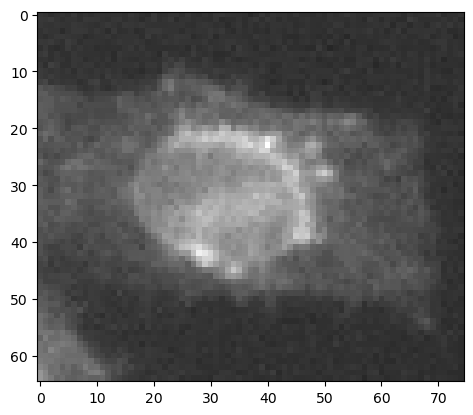

In [18]:
image = imread(os.path.join(image_input_folder,'CorrWGA_Site_17_sc1.tif'))
image = skimage.util.img_as_float(image)
pixels = image.copy()

plt.imshow(image, cmap='gray', vmax=pixels.max(), vmin=0)
plt.show()

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/WGA_granularity_ero_1.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/WGA_granularity_ero_2.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/WGA_granularity_ero_3.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/WGA_granularity_ero_4.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipy

<Figure size 640x480 with 0 Axes>

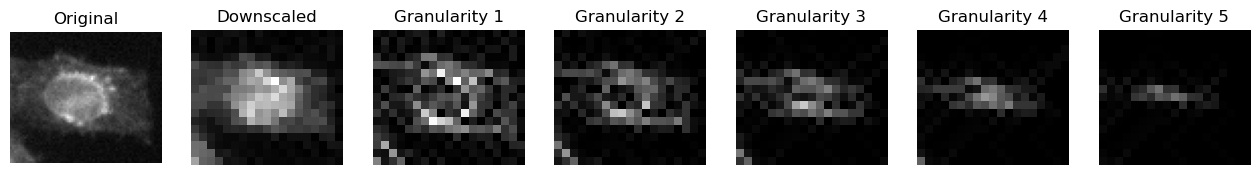

In [19]:
show_granularity_result('WGA_granularity', pixels,.25,.25,10,5, viewscale=.5, outputseparate=True)

# ER

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/3307112931.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(os.path.join(image_input_folder,'CorrER_Site_17_sc1.tif'))


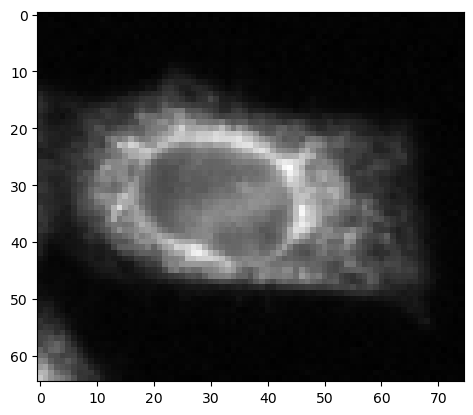

In [20]:
image = imread(os.path.join(image_input_folder,'CorrER_Site_17_sc1.tif'))
image = skimage.util.img_as_float(image)
pixels = image.copy()

plt.imshow(image, cmap='gray')
plt.show()

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/ER_Granularity_ero_1.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/ER_Granularity_ero_2.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/ER_Granularity_ero_3.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_40394/307666763.py:80: UserWarning: outputs/ER_Granularity_ero_4.tif is a low contrast image
  skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykern

<Figure size 640x480 with 0 Axes>

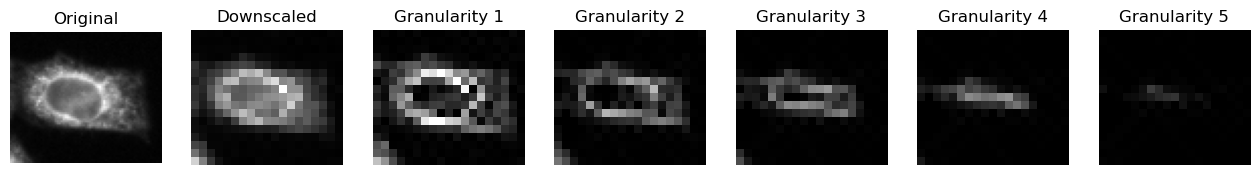

In [21]:
show_granularity_result('ER_Granularity', pixels,.25,.25,10,5, viewscale=.5, outputseparate=True)